## Utilização da classe `read_diag` para radio ocultação GNSS

In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

### Variáveis principais

Na tabela a seguir, estão relacionadas os valores padrão das variáveis utilizadas ao longo deste tutorial. Observe que as variáveis possuem diferentes tipos e que algumas podem ser declaradas como `None`.

| Variáveis |     | Valores          | Tipo              |
| :---:     |:---:| :---             | :---              |
| `DIRdiag` | =   | `/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout` | string |
|`varName`  | =   | `uv`             | string            |  
|`varType`  | =   | `220`            | integer           |        
|`dateIni`  | =   | `2019121000`     | string            |
|`dateFin`  | =   | `2019121118`     | string            |
|`nHour`    | =   | `6`              | string            | 
|`vminOMA`  | =   | `-2.0`           | float             |
|`vmaxOMA`  | =   | `2.0`            | float             |
|`vminSTD`  | =   | `0.0`            | float             |
|`vmaxSTD`  | =   | `14.0`           | float             |
|`Level`    | =   | `1000`           | integer ou `None` |
|`Lay`      | =   | `15`             | integer ou `None` |
|`SingleL`  | =   | `OneL`           | string            |
                          
Dessa forma, na célula a seguir são ajustadas as variáveis seguindo os valores da tabela acima. Além disso, são ajustados também os valores das datas para compor o caminho e os nomes dos arquivos de diagnóstico do GSI:

In [2]:
DIRdiag = '/home/thamiris/ROGNSS'
varName = 'gps'
varType = 269
dateIni = '2024030100' 
dateFin = '2024030106' 
nHour = '6'          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = 15           
SingleL = 'OneL' 

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)

['2024030100', '2024030106']


Gerando as variáveis `path` e `pathc` onde estarão os caminhos completos (incluindo nome do arquivo) dos arquivos diagnósticos do primeiro (OmF) e último (OmA) outer loop:

In [3]:
paths, pathsc = [], []

OuterL = '01'        
[paths.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterL + '.' + dt) for dt in dates]

OuterLc = '03'
[pathsc.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterLc + '.' + dt) for dt in dates]

print(paths)
print('')
print(pathsc)

['/home/thamiris/ROGNSS/2024030100/diag_conv_01.2024030100', '/home/thamiris/ROGNSS/2024030106/diag_conv_01.2024030106']

['/home/thamiris/ROGNSS/2024030100/diag_conv_03.2024030100', '/home/thamiris/ROGNSS/2024030106/diag_conv_03.2024030106']


### Leitura dos arquivos de diagnósticos

**Nota:** a leitura dos arquivos de diagnóstico seguindo os valores ajustados para os parâmetros acima, requer pelo menos 8GB de memória RAM. Caso seja necessário, ajuste os parâmetros para considerar um intervalo menor.

Lendo os arquivos diagnósticos com a função `read_diag()` do pacote `readDiag`. No trecho de código a seguir, observe que a função `read_diag()` é utilizada dentro de um loop que varia sobre todos os arquivos das listas `paths` e `pathsc` definidas no passo anterior. No final do loop, é gerada a lista `gdf_list` que conterá todos os arquivos lidos pelo `readDiag`:

In [4]:
read = True

if read:        
    gdf_list = []
    print('')
    
    print('Aguarde, o tempo total estimado para a leitura dos arquivos é de ' +
          str(int((float(len(paths))*20)/60)) + ' minutos e ' +
          str(int((float(len(paths))*20)%60)) + ' segundos.')
    
    print('')
    
    for path, pathc in zip(paths, pathsc):
        print('Reading ' + path)
        
        gdf = gd.read_diag(path, pathc)
        
        gdf_list.append(gdf)
        
    print('Pronto!')    


Aguarde, o tempo total estimado para a leitura dos arquivos é de 0 minutos e 40 segundos.

Reading /home/thamiris/ROGNSS/2024030100/diag_conv_01.2024030100
 
>>> GSI DIAG <<<
 
Reading /home/thamiris/ROGNSS/2024030106/diag_conv_01.2024030106
 
>>> GSI DIAG <<<
 
Pronto!


A variável `gdf_list` é uma lista de dataframes contendo os dados de cada arquivo diagnóstico. Para trabalhar com um único tempo basta informar a lista com o índice fixo, por exemplo: `gdf_list[0]`:

In [5]:
gdf_list

Fazendo `tidx = 0`, obtemos o primeiro objeto da lista `gdf_list`:

In [6]:
tidx = 0
gdf_list[tidx]

### Obtendo informações dos arquivos

Utilize a função `pfileinfo()` para obter uma lista das observações e seus respectivos tipos (`kx`) que estão contidos dentro do arquivo:

In [7]:
read = True

if read:        
    gdf_list = []
    print('')
    
    print('Please wait; the estimated total time for reading the files is ' +
          str(int((float(len(paths))*20)/60)) + ' minutes and ' +
          str(int((float(len(paths))*20)%60)) + ' seconds.')
    
    print('')
    
    for path, pathc in zip(paths, pathsc):
        print('Reading ' + path)
        
        gdf = gd.read_diag(path, pathc)
        
        gdf_list.append(gdf)
        
    print('Done!')    


Please wait; the estimated total time for reading the files is 0 minutes and 40 seconds.

Reading /home/thamiris/ROGNSS/2024030100/diag_conv_01.2024030100
 
>>> GSI DIAG <<<
 
Reading /home/thamiris/ROGNSS/2024030106/diag_conv_01.2024030106
 
>>> GSI DIAG <<<
 
Done!


In [8]:
tidx = 0
gdf_list[tidx].pfileinfo()

Variable Name : ps
              └── kx => 120  181  187  180  183  

Variable Name : t
              └── kx => 120  181  187  180  183  130  126  132  

Variable Name : q
              └── kx => 120  181  187  180  183  132  

Variable Name : uv
              └── kx => 244  260  255  220  281  253  254  287  280  221  284  230  243  252  242  250  245  247  246  282  224  240  232  

Variable Name : gps
              └── kx => 269  5  42  754  3  752  755  750  751  753  66  44  825  

Variable Name : sst
              └── kx => 181  187  183  



Gerando dicionários para as datas 2024030100 e 2024030106 com todas as informações sobre as variáveis e tipos contidos no arquivo, com o método `obsInfo`

In [9]:
dict_00h = gdf_list[tidx].obsInfo
dict_06h = gdf_list[1].obsInfo
dict_00h

{'ps':                   lat         lon   elev          prs    hgt   press  \
 kx  points                                                             
 120 0      -70.769997   11.830000  119.0   958.000000  119.0   900.0   
     1      -33.980000   18.600000   52.0  1007.000000   52.0  1000.0   
     2      -28.410000   21.260000  849.0   921.000000  849.0   900.0   
     3       -4.820000   11.900000   17.0  1008.000000   17.0  1000.0   
     4       13.480000    2.170000  227.0   986.000000  227.0   900.0   
 ...               ...         ...    ...          ...    ...     ...   
 183 3601    64.453003  338.596985  501.0   938.700012  501.0   900.0   
     3602    49.432919  357.401886  101.0   988.599976  101.0   900.0   
     3603    64.015999  343.032990   20.0   994.500000   20.0   900.0   
     3604    64.603996  340.980988  693.0   915.200012  693.0   900.0   
     3605    65.037003  345.760010   43.0   995.000000   43.0   900.0   
 
                   time  idqc  iuse  iusev 

Verificar todas as variáveis disponíveis no dicionario

In [10]:
gdf_list[tidx].obsInfo.keys()

dict_keys(['ps', 't', 'q', 'uv', 'gps', 'sst'])

Verificar todas as colunas disponíveis do `gps` no dicionario

In [11]:
gdf_list[tidx].obsInfo['gps'].keys()

Index(['lat', 'lon', 'elev', 'prs', 'hgt', 'press', 'time', 'idqc', 'iuse',
       'iusev', 'wpbqc', 'inp_err', 'adj_err', 'inverr', 'oer', 'obs', 'omf',
       'oma', 'imp', 'dfs', 'geometry'],
      dtype='object')

Acessando a variável específica `gps`

In [12]:
print('Variável: ', varName)
gdf_list[tidx].obsInfo[varName]

Variável:  gps


lat         lon      elev         prs      hgt  press  time  \
kx  points                                                                      
269 0      -82.978798   19.372950  0.000000    0.000000   4065.0    0.0 -94.0   
    1      -82.983231   19.417009  0.142215  676.316223   4195.0  600.0 -94.0   
    2      -82.987556   19.460310  0.017160  660.455444   4325.5  600.0 -94.0   
    3      -82.991768   19.502729 -0.027481  645.338440   4457.0  600.0 -94.0   
    4      -82.995857   19.544319 -0.014903  630.608948   4589.0  600.0 -94.0   
...               ...         ...       ...         ...      ...    ...   ...   
825 6874    48.958809  295.539795  0.000000    0.000000  58960.5    0.0 -18.0   
    6875    48.959900  295.538025  0.000000    0.000000  59160.5    0.0 -18.0   
    6876    48.960991  295.536224  0.000000    0.000000  59360.5    0.0 -18.0   
    6877    48.962090  295.534424  0.000000    0.000000  59560.5    0.0 -18.0   
    6878    48.963188  295.532623  0.000000    0.000000  59760.5    0.0 -18.0   

            idqc  iuse  iusev  ...      inp_err      adj_err       inverr  \
kx  points                     ...                                          
269 0        1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
    1        4.0  -1.0    0.0  ...   747.129822  1754.335571     0.000000   
    2        0.0   1.0    0.0  ...   920.988281  1858.201416  1858.201416   
    3        0.0   1.0    0.0  ...  1011.542847  1970.043579  1970.043579   
    4        0.0   1.0    0.0  ...  1051.840088  2090.108643  2090.108643   
...          ...   ...    ...  ...          ...          ...          ...   
825 6874     1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
    6875     1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
    6876     1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
    6877     1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
    6878     1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   

                 oer       obs       omf           oma       imp       dfs  \
kx  points                                                                   
269 0            NaN  0.020558  0.000000  0.000000e+00       NaN       NaN   
    1            NaN  0.021503  0.003058  2.937064e-03       NaN       NaN   
    2       0.000538  0.017779  0.000305  2.313862e-04 -0.000073 -0.000042   
    3       0.000508  0.016508 -0.000454 -4.176322e-04 -0.000062 -0.000032   
    4       0.000478  0.016196 -0.000241 -1.470360e-04 -0.000077 -0.000048   
...              ...       ...       ...           ...       ...       ...   
825 6874         NaN  0.000003  0.000000 -1.434617e-06       NaN       NaN   
    6875         NaN  0.000004  0.000000 -9.113011e-07       NaN       NaN   
    6876         NaN  0.000004  0.000000  0.000000e+00       NaN       NaN   
    6877         NaN  0.000005  0.000000  0.000000e+00       NaN       NaN   
    6878         NaN  0.000005  0.000000  0.000000e+00       NaN       NaN   

                              geometry  
kx  points                              
269 0       POINT (19.37296 -82.97880)  
    1       POINT (19.41701 -82.98323)  
    2       POINT (19.46031 -82.98756)  
    3       POINT (19.50273 -82.99177)  
    4       POINT (19.54431 -82.99586)  
...                                ...  
825 6874    POINT (-64.46021 48.95881)  
    6875    POINT (-64.46198 48.95990)  
    6876    POINT (-64.46378 48.96099)  
    6877    POINT (-64.46558 48.96209)  
    6878    POINT (-64.46738 48.96319)  

[674453 rows x 21 columns]

Acessando variável `gps` e do `tipo específico (269)`:

In [13]:
print('Variável: ', varName, ' e Tipo: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType]

Variável:  gps  e Tipo:  269


lat         lon      elev         prs      hgt  press   time  \
points                                                                       
0      -82.978798   19.372950  0.000000    0.000000   4065.0    0.0  -94.0   
1      -82.983231   19.417009  0.142215  676.316223   4195.0  600.0  -94.0   
2      -82.987556   19.460310  0.017160  660.455444   4325.5  600.0  -94.0   
3      -82.991768   19.502729 -0.027481  645.338440   4457.0  600.0  -94.0   
4      -82.995857   19.544319 -0.014903  630.608948   4589.0  600.0  -94.0   
...           ...         ...       ...         ...      ...    ...    ...   
265512  80.374527  359.015503  0.000000    0.000000  58701.5    0.0  129.0   
265513  80.377251  358.958527  0.000000    0.000000  59009.0    0.0  129.0   
265514  80.379959  358.901550  0.000000    0.000000  59316.5    0.0  129.0   
265515  80.382652  358.844513  0.000000    0.000000  59624.5    0.0  129.0   
265516  80.385323  358.787689  0.000000    0.000000  59930.5    0.0  129.0   

        idqc  iuse  iusev  ...      inp_err      adj_err       inverr  \
points                     ...                                          
0        1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
1        4.0  -1.0    0.0  ...   747.129822  1754.335571     0.000000   
2        0.0   1.0    0.0  ...   920.988281  1858.201416  1858.201416   
3        0.0   1.0    0.0  ...  1011.542847  1970.043579  1970.043579   
4        0.0   1.0    0.0  ...  1051.840088  2090.108643  2090.108643   
...      ...   ...    ...  ...          ...          ...          ...   
265512   1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
265513   1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
265514   1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
265515   1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   
265516   1.0  -1.0    0.0  ...     0.000000     0.000000     0.000000   

             oer       obs       omf       oma       imp       dfs  \
points                                                               
0            NaN  0.020558  0.000000  0.000000       NaN       NaN   
1            NaN  0.021503  0.003058  0.002937       NaN       NaN   
2       0.000538  0.017779  0.000305  0.000231 -0.000073 -0.000042   
3       0.000508  0.016508 -0.000454 -0.000418 -0.000062 -0.000032   
4       0.000478  0.016196 -0.000241 -0.000147 -0.000077 -0.000048   
...          ...       ...       ...       ...       ...       ...   
265512       NaN  0.000001  0.000000  0.000000       NaN       NaN   
265513       NaN  0.000004  0.000000  0.000000       NaN       NaN   
265514       NaN  0.000005  0.000000  0.000000       NaN       NaN   
265515       NaN  0.000006  0.000000  0.000000       NaN       NaN   
265516       NaN  0.000006  0.000000  0.000000       NaN       NaN   

                          geometry  
points                              
0       POINT (19.37296 -82.97880)  
1       POINT (19.41701 -82.98323)  
2       POINT (19.46031 -82.98756)  
3       POINT (19.50273 -82.99177)  
4       POINT (19.54431 -82.99586)  
...                            ...  
265512   POINT (-0.98450 80.37453)  
265513   POINT (-1.04150 80.37725)  
265514   POINT (-1.09845 80.37996)  
265515   POINT (-1.15552 80.38265)  
265516   POINT (-1.21228 80.38532)  

[265517 rows x 21 columns]

Acessando os valores de `observacao` da variável `gps` e do `tipo específico (269)`:

In [14]:
print('Variável: ', varName, ' e Tipo: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType].obs

Variável:  gps  e Tipo:  269


points
0         0.020558
1         0.021503
2         0.017779
3         0.016508
4         0.016196
            ...   
265512    0.000001
265513    0.000004
265514    0.000005
265515    0.000006
265516    0.000006
Name: obs, Length: 265517, dtype: float32

Acessando os valores de `observacao` da variável `gps` e do `tipo específico (269)` para a latitude, longitude e elevacao especifica:

In [15]:
# Defina o valor alvo e a tolerância
lat_target = -23.10
tolerance = 0.0001  # Ajuste a tolerância conforme necessário

In [16]:
# Aplique a filtragem diretamente no DataFrame
filtered_df = dict_00h['t'][dict_00h['t']['lat'].between(lat_target - tolerance, lat_target + tolerance)]
filtered_df

lat         lon    elev          prs     hgt   press   time  \
kx  points                                                                 
180 21008  -23.1  316.000000     0.0  1012.000000     0.0  1000.0 -120.0   
130 1142   -23.1  183.399994  8839.0   314.899994  8839.0   300.0  117.0   

            idqc  iuse  iusev  ...   inp_err   adj_err    inverr        oer  \
kx  points                     ...                                            
180 21008    2.0   1.0    0.0  ...  0.400000  0.400000  0.026216  36.662449   
130 1142     1.0   1.0    0.0  ...  0.588235  0.588235  0.588235   1.700000   

                   obs       omf       oma       imp       dfs  \
kx  points                                                       
180 21008   305.149994  4.799333  4.230832 -0.140025 -0.074420   
130 1142    247.149994  0.129749  0.831359  0.396660  0.053549   

                                geometry  
kx  points                                
180 21008    POINT (-44.00000 -23.10000)  
130 1142    POINT (-176.60001 -23.10000)  

[2 rows x 21 columns]

In [17]:
filtered_df = dict_00h['gps'][dict_00h['gps']['lat'].between(lat_target - tolerance, lat_target + tolerance)]
filtered_df

lat         lon      elev         prs      hgt  press   time  \
kx  points                                                                      
754 4889   -23.10001   29.102400 -0.037203  775.721619   3959.0  700.0   -4.0   
    4967   -23.10009   28.262190  0.004412  111.142685  16398.5  100.0   -4.0   
    35834  -23.10000  241.692368 -0.401310  679.381226   4725.5  600.0  150.0   

            idqc  iuse  iusev  ...       inp_err       adj_err        inverr  \
kx  points                     ...                                             
754 4889     0.0   1.0    0.0  ...    619.587158    942.771423    942.771423   
    4967     0.0   1.0    0.0  ...  28549.812500  17682.232422  10208.841797   
    35834    4.0  -1.0    0.0  ...   1304.730957   1057.108887      0.000000   

                 oer       obs       omf       oma           imp  \
kx  points                                                         
754 4889    0.001061  0.025074 -0.000933  0.000401 -6.689054e-04   
    4967    0.000098  0.003503  0.000015  0.000012 -8.724323e-07   
    35834        NaN  0.013336 -0.005352 -0.002814           NaN   

                     dfs                      geometry  
kx  points                                              
754 4889   -1.172812e-03    POINT (29.10240 -23.10001)  
    4967   -4.843142e-07    POINT (28.26219 -23.10009)  
    35834            NaN  POINT (-118.30762 -23.10000)  

[3 rows x 21 columns]

In [18]:
filtered_df = dict_00h['ps'][dict_00h['ps']['lat'].between(lat_target - tolerance, lat_target + tolerance)]
filtered_df

lat    lon  elev     prs  hgt   press   time  idqc  iuse  iusev  \
kx  points                                                                     
180 28351  -23.1  316.0   0.0  1012.0  0.0  1000.0 -120.0   2.0   1.0    0.0   

            ...   inp_err   adj_err    inverr       oer     obs       omf  \
kx  points  ...                                                             
180 28351   ...  0.769231  0.769231  0.696462  1.414824  1012.0  1.821166   

                 oma       imp       dfs                     geometry  
kx  points                                                             
180 28351   0.829281 -1.858137 -1.276756  POINT (-44.00000 -23.10000)  

[1 rows x 21 columns]

In [19]:
filtered_df = dict_00h['q'][dict_00h['q']['lat'].between(lat_target - tolerance, lat_target + tolerance)]
filtered_df

lat    lon  elev     prs  hgt   press   time  idqc  iuse  iusev  \
kx  points                                                                     
180 8596   -23.1  316.0   0.0  1012.0  0.0  1000.0 -120.0   2.0   1.0    0.0   

            ...       inp_err       adj_err        inverr        oer     obs  \
kx  points  ...                                                                
180 8596    ...  216783.53125  216783.53125  97662.921875  10.334564  21.684   

                 omf       oma       imp       dfs  \
kx  points                                           
180 8596    2.427223  2.481916  0.025981  0.012846   

                               geometry  
kx  points                               
180 8596    POINT (-44.00000 -23.10000)  

[1 rows x 21 columns]

In [20]:
filtered_df = dict_00h['uv'][dict_00h['uv']['lat'].between(lat_target - tolerance, lat_target + tolerance)]
filtered_df

lat         lon      elev         prs     hgt  press   time  \
kx  points                                                                      
254 8152   -23.100019   11.890530  110035.0  418.799988    35.0  400.0  -30.0   
280 18357  -23.100000  316.000000       0.0  986.754089    10.0  900.0 -120.0   
230 1147   -23.100000  183.399994    8839.0  314.899994  8839.0  300.0  117.0   
252 36     -23.100000   94.970001   76082.0  972.400024    88.0  900.0   10.0   
    126    -23.100000   94.970001   81086.0  947.799988    91.0  900.0   70.0   
    997    -23.100000  102.349998   82082.0  913.099976    88.0  900.0   10.0   
    6559   -23.100000  159.839996   92094.0  456.100006    96.0  400.0   70.0   
250 9655   -23.100000  170.759995   94095.0  310.600006    58.0  300.0   10.0   
    9810   -23.100000  170.759995   77072.0  200.899994    81.0  200.0   70.0   
245 253781 -23.100090  287.417236  110094.0  910.400024    62.0  900.0 -120.0   
    263781 -23.099939  265.743469  110096.0  882.500000    71.0  800.0   60.0   
240 13017  -23.099939  265.743469  110068.0  867.099976    64.0  800.0   60.0   
    13804  -23.099979  282.622589  110098.0  897.500000    71.0  800.0  120.0   

            idqc  iuse  iusev  ...       inp_err       adj_err        inverr  \
kx  points                     ...                                             
254 8152    15.0  -1.0  100.0  ...  1.584284e-01  1.584284e-01  2.938736e-39   
280 18357    2.0   1.0    0.0  ...  4.000000e-01  4.000000e-01  2.862183e-01   
230 1147     1.0   1.0    0.0  ...  2.777778e-01  2.777778e-01  2.777778e-01   
252 36      15.0  -1.0  100.0  ...  2.631579e-01  2.631579e-01  2.938736e-39   
    126      2.0   1.0    0.0  ...  2.631579e-01  2.631579e-01  2.631579e-01   
    997     15.0  -1.0  100.0  ...  2.631579e-01  2.631579e-01  2.631579e-01   
    6559     2.0   1.0    0.0  ...  2.044906e-01  2.044906e-01  2.044906e-01   
250 9655     2.0   1.0    0.0  ...  1.326893e-01  1.326893e-01  1.326893e-01   
    9810    15.0  -1.0  100.0  ...  1.250000e-01  1.250000e-01  1.250000e-01   
245 253781  15.0  -1.0  100.0  ...  1.315790e-01  1.315790e-01  1.315790e-01   
    263781  15.0  -1.0  100.0  ...  1.315790e-01  1.315790e-01  1.315790e-01   
240 13017   15.0  -1.0  100.0  ...  2.000000e-09  2.000000e-09  2.000000e-09   
    13804   15.0  -1.0  100.0  ...  2.000000e-09  2.000000e-09  2.000000e-09   

                     oer        obs       omf       oma           imp  \
kx  points                                                              
254 8152             NaN  -6.860750 -9.494518 -8.344798           NaN   
280 18357   3.493837e+00   0.000000  0.396995 -0.749227  1.155566e-01   
230 1147    3.600000e+00  12.000000 -5.010929 -4.490111 -1.374532e+00   
252 36               NaN  -4.228617  5.706947  2.434644           NaN   
    126     3.800000e+00  -4.727593  5.341175  2.060198 -6.390457e+00   
    997     3.800000e+00  -4.468175  5.755489  4.945845 -2.280072e+00   
    6559    4.890200e+00  -3.043044 -2.672170 -2.002826 -6.398879e-01   
250 9655    7.536400e+00  21.886660  2.892013  2.164925 -4.878770e-01   
    9810    8.000000e+00  28.436590 -1.399823 -1.976219  2.432419e-01   
245 253781  7.600000e+00   0.565027  1.247075  2.028996  3.370566e-01   
    263781  7.600000e+00 -11.017262 -2.161093 -2.257702  5.617066e-02   
240 13017   5.000000e+08  -9.862328  0.560195  0.638692  1.882169e-10   
    13804   5.000000e+08  -3.549994  1.613586  2.195008  4.428801e-09   

                     dfs                      geometry  
kx  points                                              
254 8152             NaN    POINT (11.89053 -23.10002)  
280 18357  -1.302419e-01   POINT (-44.00000 -23.10000)  
230 1147   -7.249398e-01  POINT (-176.60001 -23.10000)  
252 36               NaN    POINT (94.97000 -23.10000)  
    126    -4.611651e+00    POINT (94.97000 -23.10000)  
    997    -1.226289e+00   POINT (102.35001 -23.10000)  
    6559   -3.657521e-01   POINT (159.84000 -23.1

In [21]:
filtered_df = dict_00h['sst'][dict_00h['sst']['lat'].between(lat_target - tolerance, lat_target + tolerance)]
filtered_df

Empty GeoDataFrame
Columns: [lat, lon, elev, prs, hgt, press, time, idqc, iuse, iusev, wpbqc, inp_err, adj_err, inverr, oer, obs, omf, oma, imp, dfs, geometry]
Index: []

[0 rows x 21 columns]

Nao da para seguir porque cada variave foi plotada para uma determinada localidade, teria que fazer alguma interpolacao aqui para poder plotar para determinada latitude e longitude especifica para todas as variaveis

In [22]:
test = gdf_list[tidx].obsInfo[varName].loc[varType]
filt = test[test['lon'] == 315.003448].obs
filt

points
227921    0.00697
Name: obs, dtype: float32

### Analisando a correlação entre a variável `gps` com as variaveis `ps`, `t`, `q`, `uv`, `sst` e seus tipos kx para determinada latitude, longitude e nivel

In [23]:
overview_indices = gdf_list[tidx].overview()
overview_indices

{'ps': [120, 181, 187, 180, 183],
 't': [120, 181, 187, 180, 183, 130, 126, 132],
 'q': [120, 181, 187, 180, 183, 132],
 'uv': [244,
  260,
  255,
  220,
  281,
  253,
  254,
  287,
  280,
  221,
  284,
  230,
  243,
  252,
  242,
  250,
  245,
  247,
  246,
  282,
  224,
  240,
  232],
 'gps': [269, 5, 42, 754, 3, 752, 755, 750, 751, 753, 66, 44, 825],
 'sst': [181, 187, 183]}

In [24]:
obs_00h = {
    f'{key}_{idx}': gdf_list[tidx].obsInfo[key].loc[idx][gdf_list[tidx].obsInfo[key].loc[idx]['lon'] == 315.003448].obs 
    for key, idx_list in overview_indices.items() 
    for idx in idx_list
}
obs_00h

#verificar o plot das outras variaveis com valor aproximado

{'ps_120': Series([], Name: obs, dtype: float32),
 'ps_181': Series([], Name: obs, dtype: float32),
 'ps_187': Series([], Name: obs, dtype: float32),
 'ps_180': Series([], Name: obs, dtype: float32),
 'ps_183': Series([], Name: obs, dtype: float32),
 't_120': Series([], Name: obs, dtype: float32),
 't_181': Series([], Name: obs, dtype: float32),
 't_187': Series([], Name: obs, dtype: float32),
 't_180': Series([], Name: obs, dtype: float32),
 't_183': Series([], Name: obs, dtype: float32),
 't_130': Series([], Name: obs, dtype: float32),
 't_126': Series([], Name: obs, dtype: float32),
 't_132': Series([], Name: obs, dtype: float32),
 'q_120': Series([], Name: obs, dtype: float32),
 'q_181': Series([], Name: obs, dtype: float32),
 'q_187': Series([], Name: obs, dtype: float32),
 'q_180': Series([], Name: obs, dtype: float32),
 'q_183': Series([], Name: obs, dtype: float32),
 'q_132': Series([], Name: obs, dtype: float32),
 'uv_244': Series([], Name: obs, dtype: float32),
 'uv_260': Ser

## Utilização da classe `plot_diag`
A utilização das funções da classe `plot_diag` é apresentada abaixo, junto com os comandos para gerar diversos tipos de figuras.

### Distribuição espacial

#### Utilizando o metodo `plot()`
Gerando figuras com os valores de radio ocultacao GNSS do tipo 269 das `observacoes`, `oma` e `omf` do ciclo 2024030100

/home/thamiris/anaconda3/envs/readDiag/lib/python3.9/site-packages/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


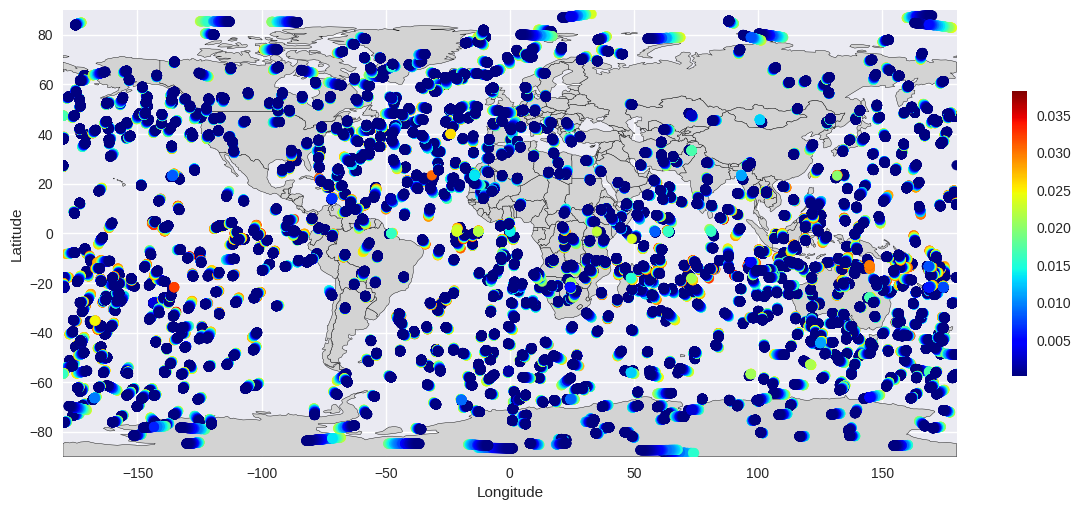

In [25]:
param='obs'
gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  mask='iuse == 1', 
                  legend='true')
figname = varName + '_' + param + '_' +dateIni+ '_plot.png'
plt.tight_layout()
plt.savefig(figname)

/home/thamiris/anaconda3/envs/readDiag/lib/python3.9/site-packages/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


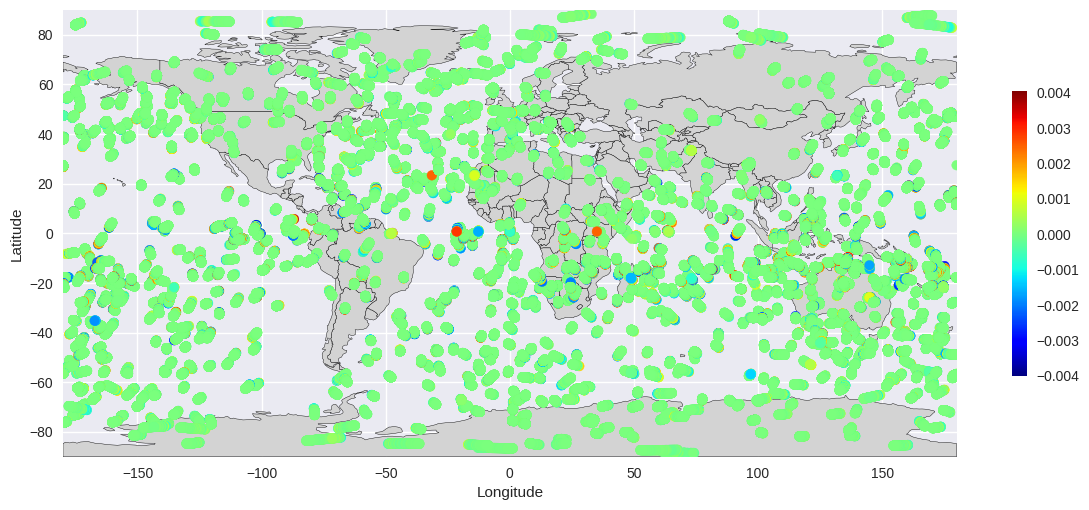

In [26]:
param='omf'
gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  mask='iuse == 1', 
                  legend='true')
figname = varName + '_' + param + '_' +dateIni+ '_plot.png'
plt.tight_layout()
plt.savefig(figname)

/home/thamiris/anaconda3/envs/readDiag/lib/python3.9/site-packages/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


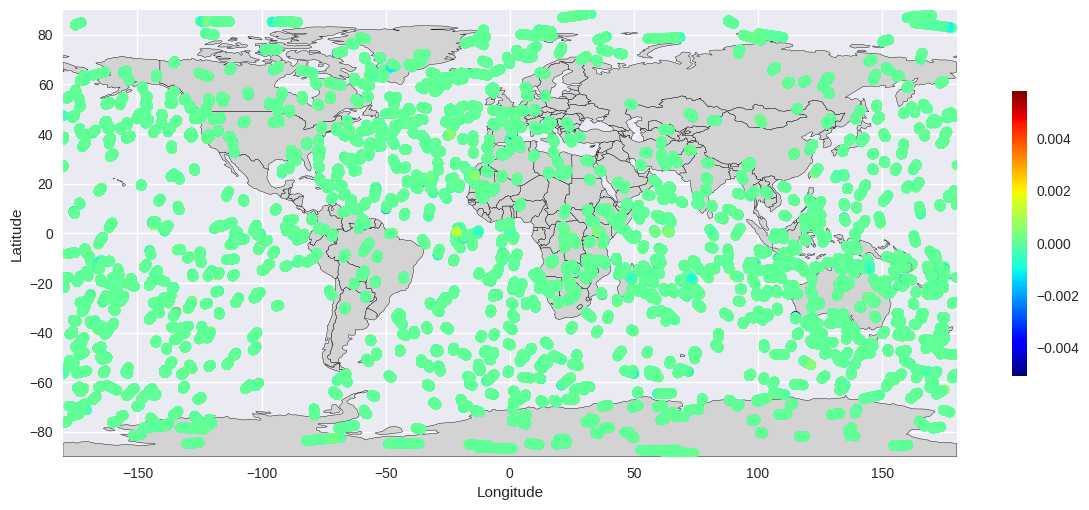

In [27]:
param='oma'
gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  mask='iuse == 1', 
                  legend='true')
figname = varName + '_' + param + '_' +dateIni+ '_plot.png'
plt.tight_layout()
plt.savefig(figname)

Gerando uma figura com os valores de radio ocultacao GNSS do tipo 269 das `observacoes`, `oma` e `omf` do ciclo 2024030106

/home/thamiris/anaconda3/envs/readDiag/lib/python3.9/site-packages/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


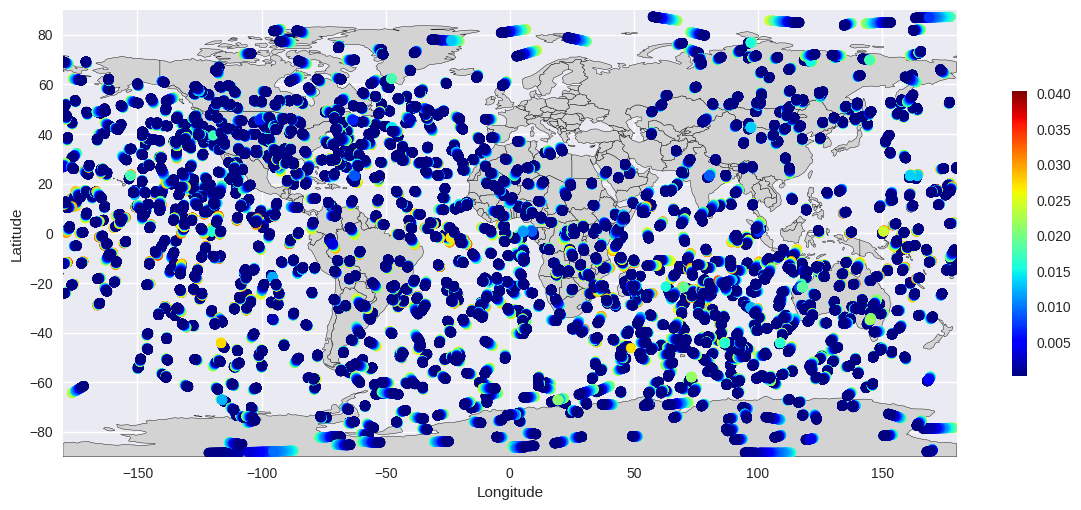

In [28]:
param='obs'
gd.plot_diag.plot(gdf_list[1], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  mask='iuse == 1', 
                  legend='true')
figname = varName + '_' + param + '_' +dateFin+ '_plot.png'
plt.tight_layout()
plt.savefig(figname)

/home/thamiris/anaconda3/envs/readDiag/lib/python3.9/site-packages/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


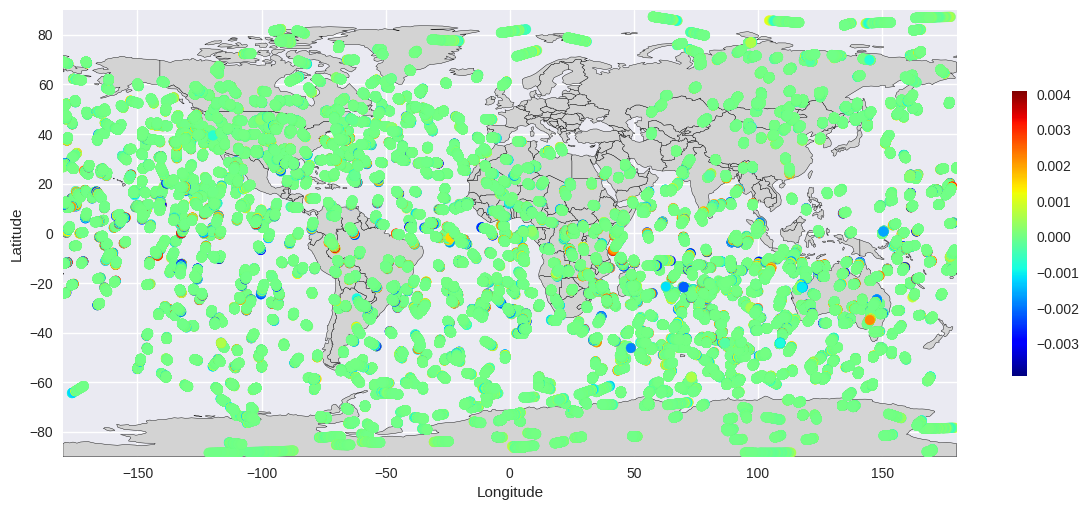

In [29]:
param='omf'
gd.plot_diag.plot(gdf_list[1], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  mask='iuse == 1', 
                  legend='true')
figname = varName + '_' + param + '_' +dateFin+ '_plot.png'
plt.tight_layout()
plt.savefig(figname)

/home/thamiris/anaconda3/envs/readDiag/lib/python3.9/site-packages/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


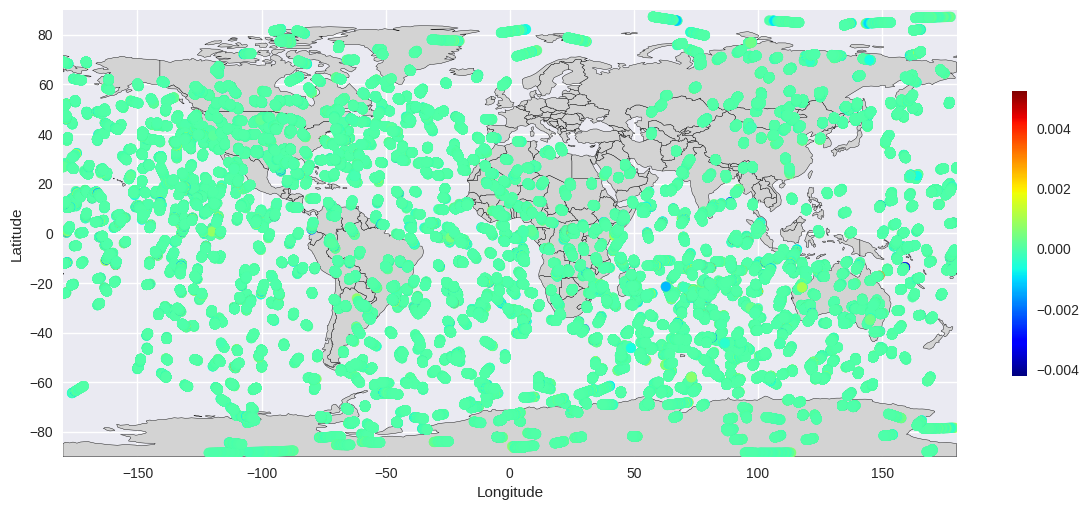

In [30]:
param='oma'
gd.plot_diag.plot(gdf_list[1], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  mask='iuse == 1', 
                  legend='true')
figname = varName + '_' + param + '_' +dateFin+ '_plot.png'
plt.tight_layout()
plt.savefig(figname)

#### Utilizando o metodo `ptmap()`
Gerando figura com os valores de radio ocultacao GNSS de todos os tipos  kx associados ao ciclo 2024030100

##### Erro: Invalid kx request 

O metodo `ptmap` encontra erro ao rodar para os kx do gps. 

A função getVarInfo(kx, varName, 'instrument') retorna None para alguns valores de kx (como o 269) e o código ao tentar concatenar esse `None` com uma `string`, resulta em um TypeError. 

Solucao: a saida do erro, retorna os kx validos. Entao para corrigir o erro foi adicionado a variavel valid_kx e agora faz a verificacao antes de usar o metodo `ptmap`. 

Esse erro foi corrigido apenas para testar nesse notebook, mas seria interessante olhar o codigo e implementar que o metodo `ptmap` possa plotar mais kx associados a radio ocultacao GNSS .

O erro:

/home/thamiris/anaconda3/envs/readDiag/lib/python3.9/site-packages/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


Invalid kx request: 269
try request:
	* 120
	* 130
	* 230
	* 132
	* 153
	* 180
	* 182
	* 280
	* 282
	* 181
	* 187
	* 281
	* 183
	* 284
	* 287
	* 126
	* 210
	* 220
	* 221
	* 223
	* 224
	* 228
	* 229
	* 232
	* 240
	* 242
	* 243
	* 244
	* 245
	* 246
	* 247
	* 250
	* 251
	* 252
	* 253
	* 254
	* 257
	* 258
	* 259
	* 260
	* 290
	* 3
	* 4
	* 740
	* 745
	* 744
	* 741
	* 722


TypeError: can only concatenate str (not "NoneType") to str

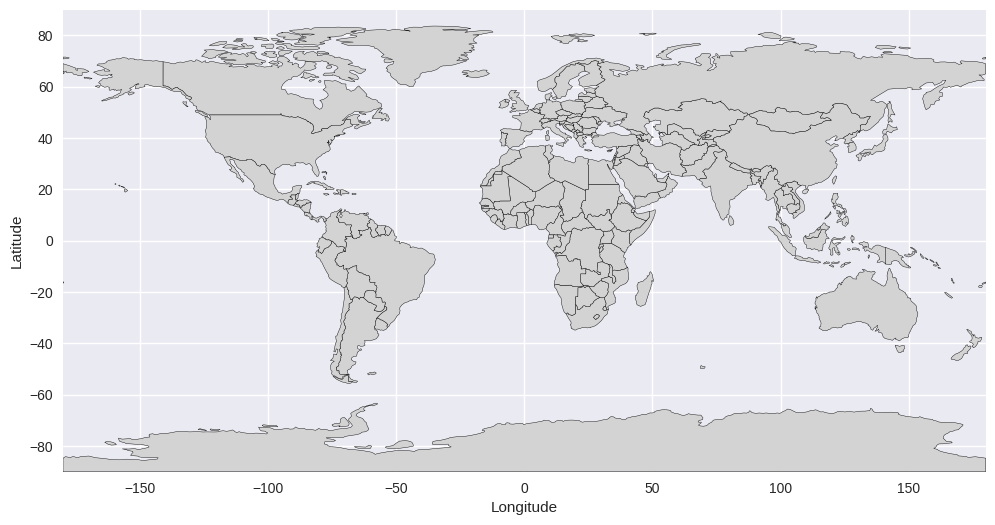

In [33]:
dict_var = gdf_list[tidx].overview()

varTypes = dict_var['gps']

idschar = '_'.join([str(item) for item in varTypes])

gd.plot_diag.ptmap(gdf_list[tidx], varName=varName, varType=varTypes)

figname = varName + '_' + idschar + '_' + 'ptmap.png'

plt.tight_layout()
plt.savefig(figname)

##### A solucao para plotar nesse notebook apenas:

/home/thamiris/anaconda3/envs/readDiag/lib/python3.9/site-packages/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


<Axes: xlabel='Longitude', ylabel='Latitude'>

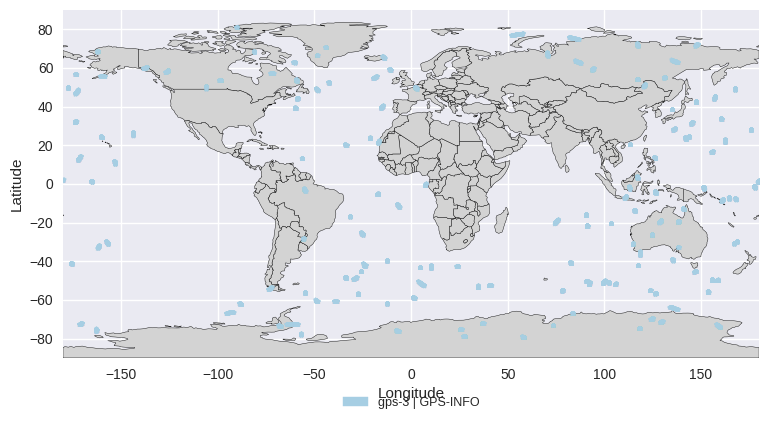

In [34]:
dict_var = gdf_list[tidx].overview()

varTypes = dict_var['gps']

valid_kx = [
    120, 130, 230, 132, 153, 180, 182, 280, 282, 181, 187, 281, 183, 
    284, 287, 126, 210, 220, 221, 223, 224, 228, 229, 232, 240, 242, 
    243, 244, 245, 246, 247, 250, 251, 252, 253, 254, 257, 258, 259, 
    260, 290, 3, 4, 740, 745, 744, 741, 722
]

# Filtra varTypes para conter apenas kx válidos
varTypes_validated = [kx for kx in varTypes if kx in valid_kx]

if not varTypes_validated:
    raise # gd.plot[269, 5, 42, 754, 3, 752, 755, 750, 751, 753, 66, 44, 825]
ValueError("Nenhum valor de kx válido encontrado em varTypes.")

# Atualizar o idschar com os valores validados
idschar = '_'.join([str(item) for item in varTypes_validated])

# Chamar a função com os kx válidos
# gd.plot_diag.ptmap(gdf_list[tidx], varName=varName, varType=varTypes_validated)
gd.plot_diag.ptmap(gdf_list[tidx], varName=varName, varType=varTypes_validated, mask='iuse==1')

#### Utilizando o metodo `pvmap()`
Gerando figura com diferentes variáveis, considerando a máscara `iuse==1`:

/home/thamiris/anaconda3/envs/readDiag/lib/python3.9/site-packages/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


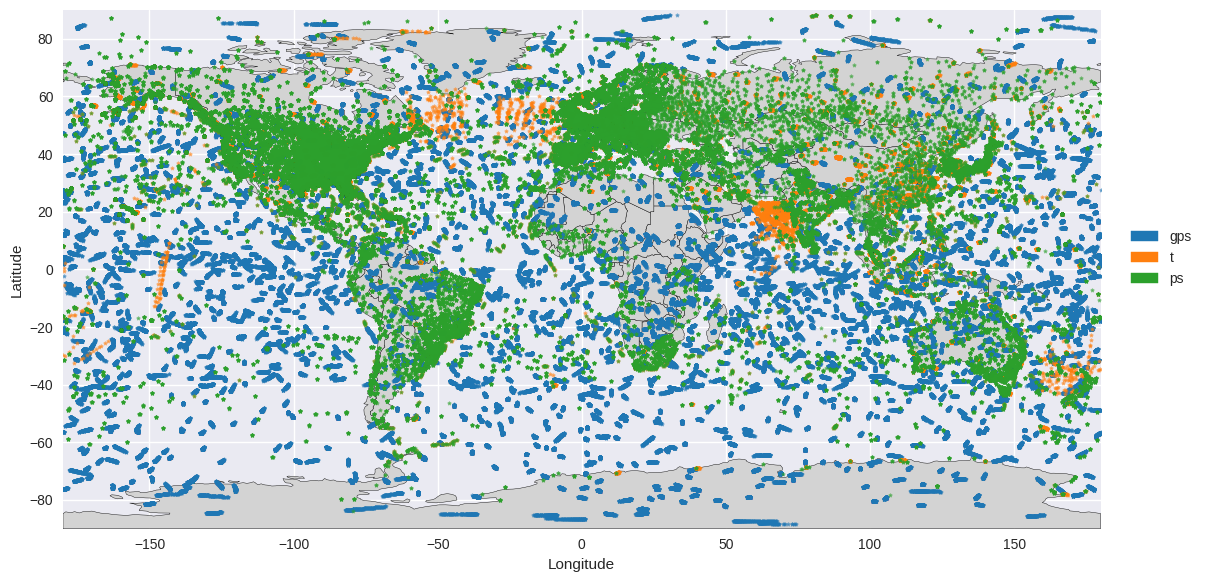

In [35]:
varNames = ['ps','t', 'gps']
idschar = '_'.join([str(item) for item in varNames])

gd.plot_diag.pvmap(gdf_list[tidx], varName=varNames, mask='iuse==1')

figname = idschar + '_pvmap.png'

plt.tight_layout()
plt.savefig(figname)

### Histograma

#### Utilizando o metodo `pcount()` 

Obtendo um histograma com a contagem do número de observações de cada kx para radio ocultacao GNSS:

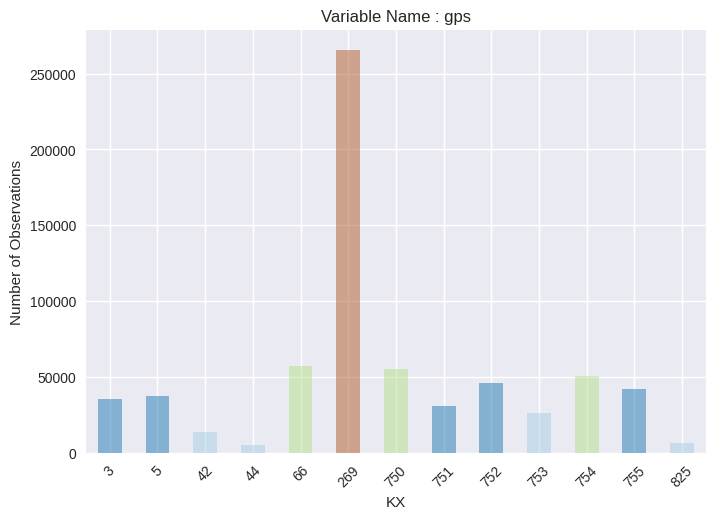

In [36]:
gd.plot_diag.pcount(gdf_list[tidx], varName)
plt.savefig('pcount')

#### Utilizando o metodo `vcount()` 

Obtendo um histograma com a contagem do número de observações para todos os tipos de variáveis do ciclo 2024030100:

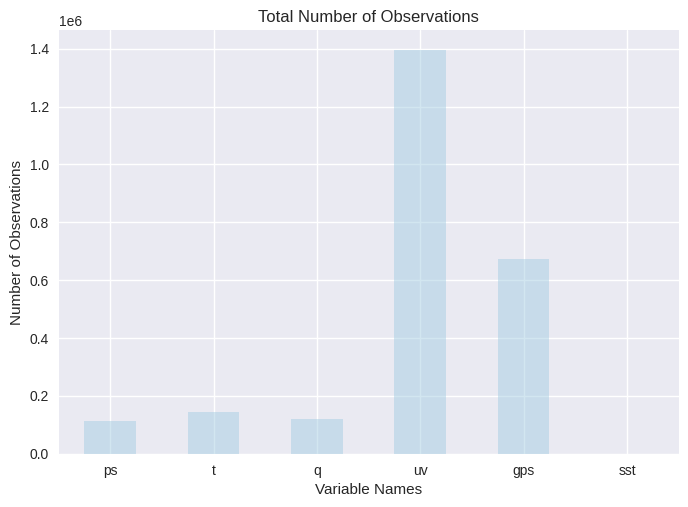

In [37]:
gd.plot_diag.vcount(gdf_list[tidx])
plt.savefig('vcount')

Obtendo um histograma com a contagem do número de observações para todos os tipos de variáveis do ciclo 2024030106:

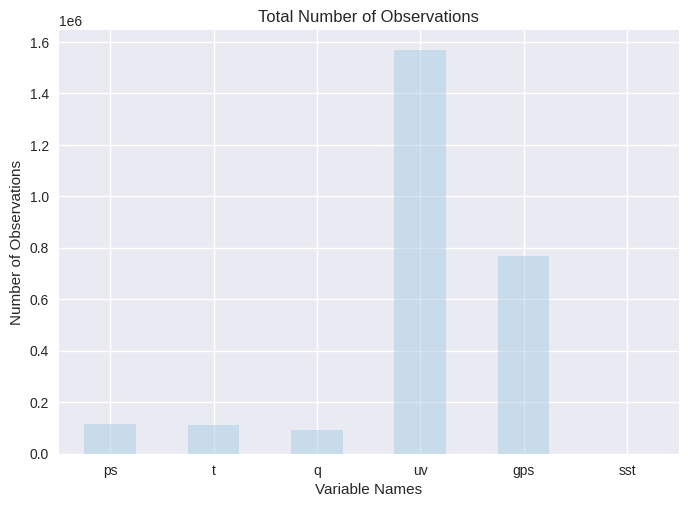

In [38]:
gd.plot_diag.vcount(gdf_list[1])

#### Utilizando o metodo `kxcount()` 

Obtendo um histograma com a contagem do número de todas as observações do ciclo 2024030100, por tipos de kx:

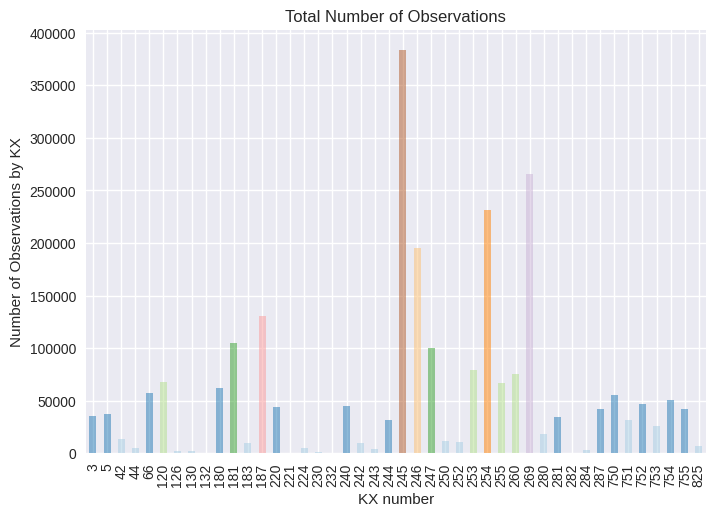

In [39]:
gd.plot_diag.kxcount(gdf_list[tidx])
plt.savefig('kxcount')

Obtendo um histograma com a contagem do número de todas as observações do ciclo 2024030106, por tipos de kx:

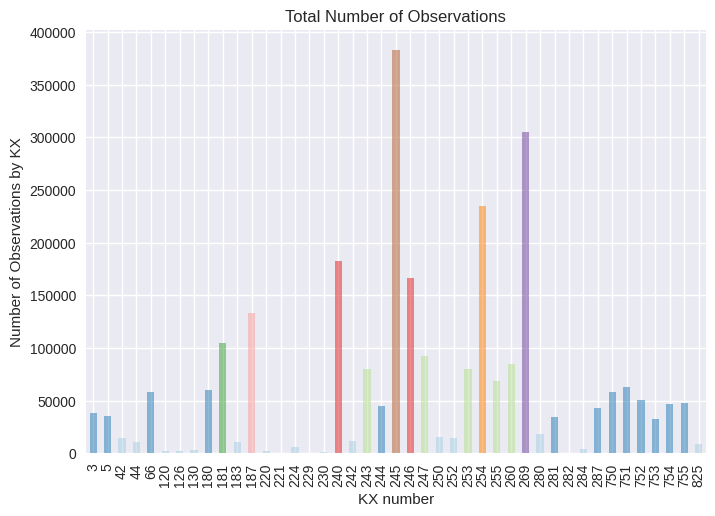

In [40]:
gd.plot_diag.kxcount(gdf_list[1])

### Série temporal

#### Utilizando o metodo `time_series()`

Inicialmente é gerada uma figura com os parâmetros já fixados nesta seção. 

Em seguida são apresentadas figuras alterando os parâmetros `Level`, `Lay` e `SingleL`.

Plotando uma série temporal do OmA e OmF:

##### Erro: Invalid kx request 

Encontra o mesmo erro do metodo `ptmap()`

In [41]:
gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)


Invalid kx request: 269
try request:
	* 120
	* 130
	* 230
	* 132
	* 153
	* 180
	* 182
	* 280
	* 282
	* 181
	* 187
	* 281
	* 183
	* 284
	* 287
	* 126
	* 210
	* 220
	* 221
	* 223
	* 224
	* 228
	* 229
	* 232
	* 240
	* 242
	* 243
	* 244
	* 245
	* 246
	* 247
	* 250
	* 251
	* 252
	* 253
	* 254
	* 257
	* 258
	* 259
	* 260
	* 290
	* 3
	* 4
	* 740
	* 745
	* 744
	* 741
	* 722


TypeError: can only concatenate str (not "NoneType") to str

##### Solucao:

Verificar os kx validos


In [42]:
varTypes_validated

[3]


 Analyzing data of variable: gps  ||  type: 3  ||  GPS-INFO  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-01:00  - Level:  1000
 Preparing data for: 2024-03-01:06  - Level:  1000


 Calculating for 2024-03-01:00
 Calculating for 2024-03-01:06


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

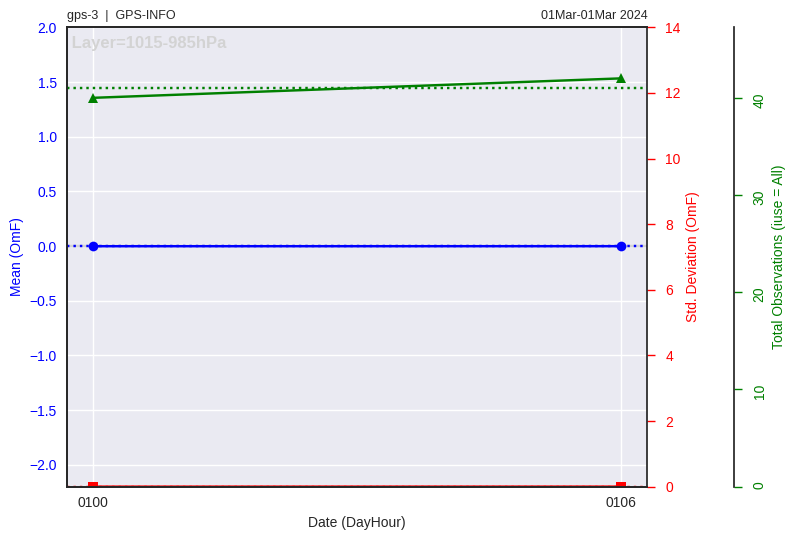

<Figure size 600x400 with 0 Axes>

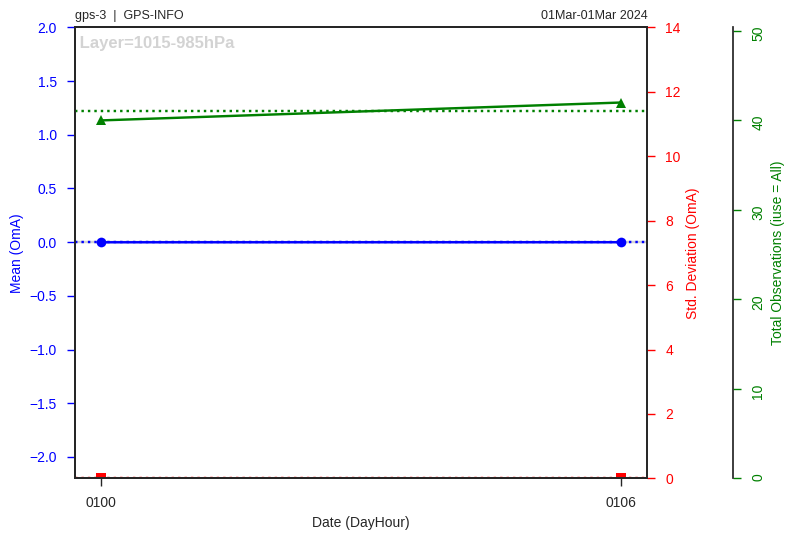

<Figure size 600x400 with 0 Axes>

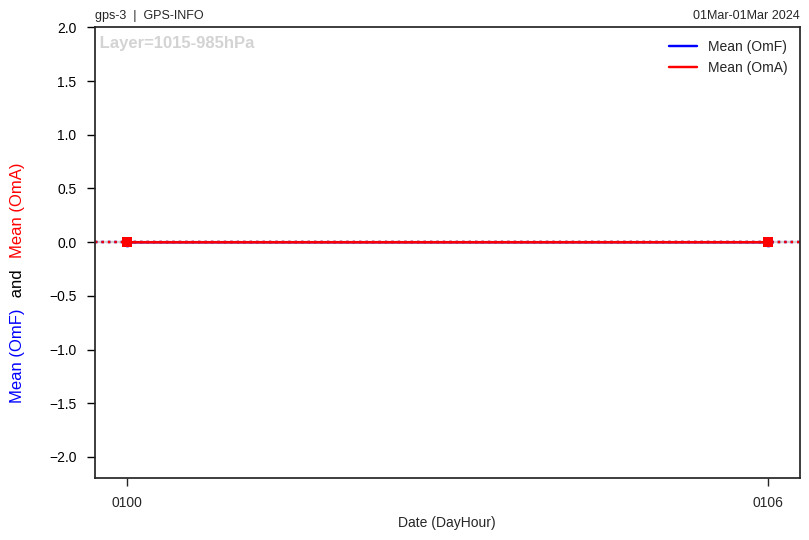

<Figure size 600x400 with 0 Axes>

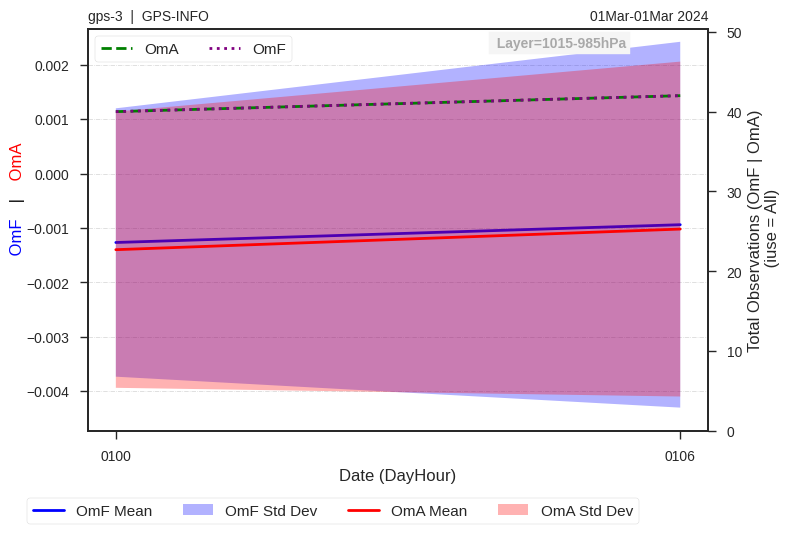

In [43]:
gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=3, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

No caso anterior, o parâmetro `Level` estava fixo em 1000 hPa com `SingleL` igual a `All`, ou seja, toda a atmosfera foi considerada como uma única camada e o valor 1000 hPa funciona apenas como uma flag para indicar que não existe variação em altura. Ainda com `Level=1000`, pode-se usar `SingleL='OneL'` para uma única camada em torno do valor de `Level`, neste caso 1000 hPa, variando entre `Level-Lay` e `Level+Lay` (na definição de variáveis, `Lay` foi fixado com 15 hPa; no caso de ser `None`, o valor padrão de 50 hPa é utilizado).


 Analyzing data of variable: gps  ||  type: 3  ||  GPS-INFO  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-01:00  - Level:  1000
 Preparing data for: 2024-03-01:06  - Level:  1000


 Calculating for 2024-03-01:00
 Calculating for 2024-03-01:06


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

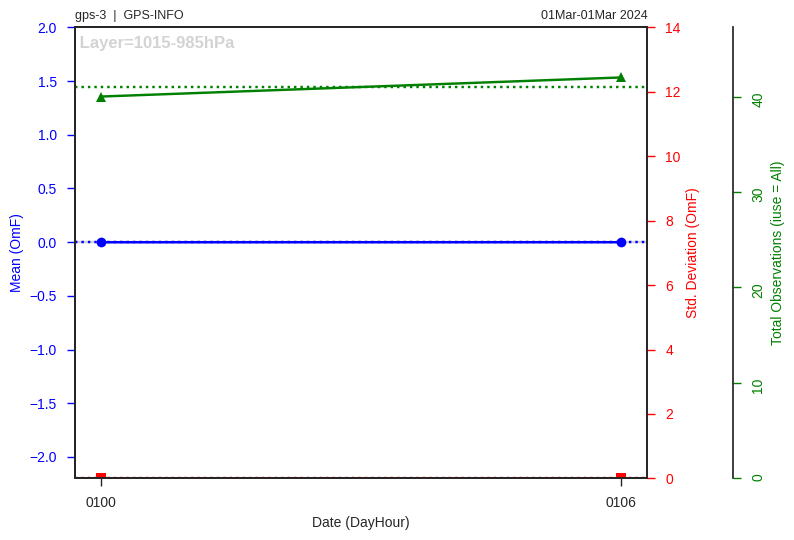

<Figure size 600x400 with 0 Axes>

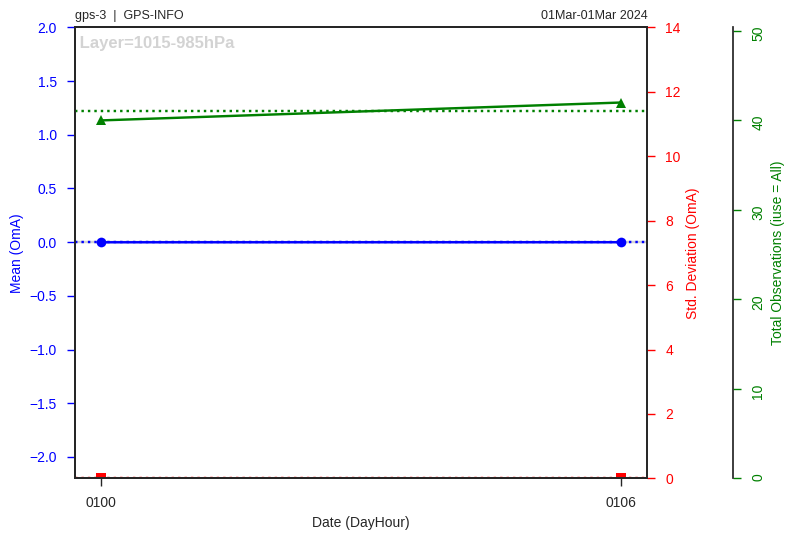

<Figure size 600x400 with 0 Axes>

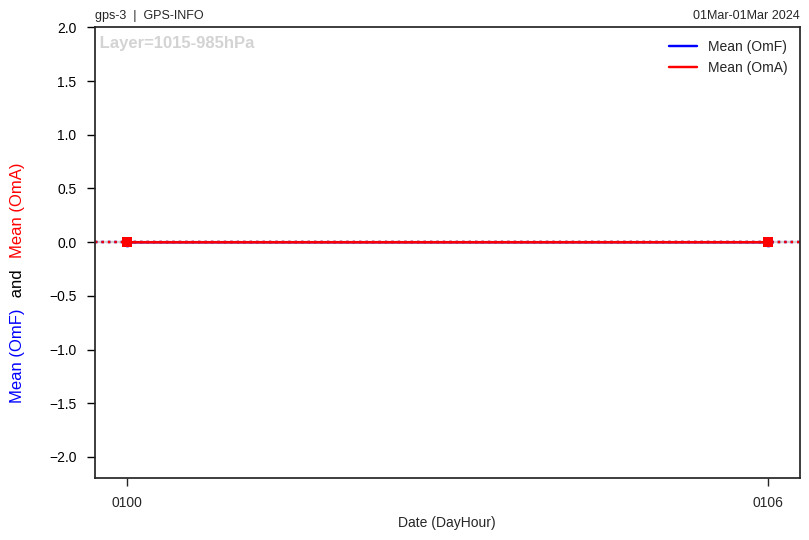

<Figure size 600x400 with 0 Axes>

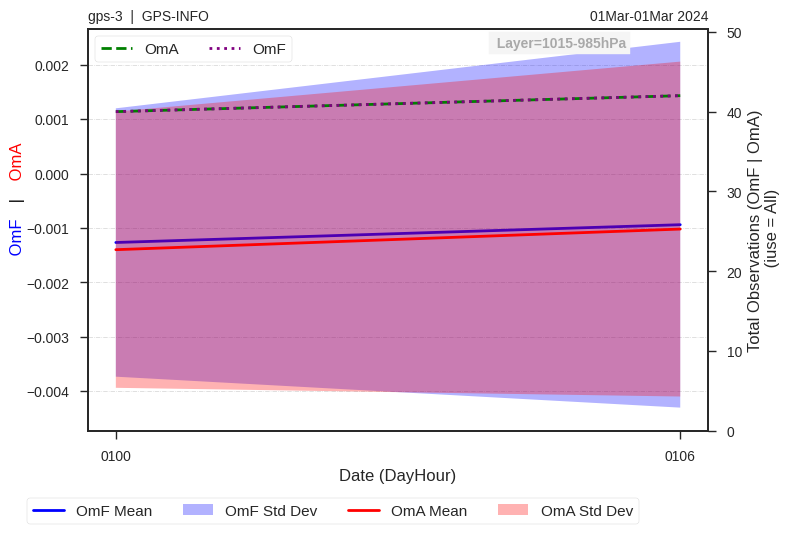

In [44]:
SingleL = 'OneL'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=3, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Observe como no exemplo acima a quantidade de dados diminui, uma vez que agora está sendo utilizada uma camada entre 1015 e 985 hPa.

Agora vamos alterar para não fixar em um único nível ou camada, ou seja, altear a variável `Level` para `None` ou `Zlevs`. A opção `None` busca os dados em cada nível existente nos arquivos e faz a figura para todos esses níveis, porém os valores no eixo y (ordenada) são apenas dos níveis padrão. É importante esclarecer que os chamados níveis padrão estão definidos na classe `read_diag` e podem ser acessados utilizando o método `zlevs` da seguinte forma:

In [45]:
gdf_list[tidx].zlevs

[1000.0,
 900.0,
 800.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 50.0,
 0.0]

Dessa forma, pode-se utilizar o parâmetro `Level='Zlevs'` para produzir uma série temporal por níveis:


 Analyzing data of variable: gps  ||  type: 3  ||  GPS-INFO  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-01:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2024-03-01:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]



 Calculating for 2024-03-01:00
 Calculating for 2024-03-01:06


 Making Graphics...
 Done!



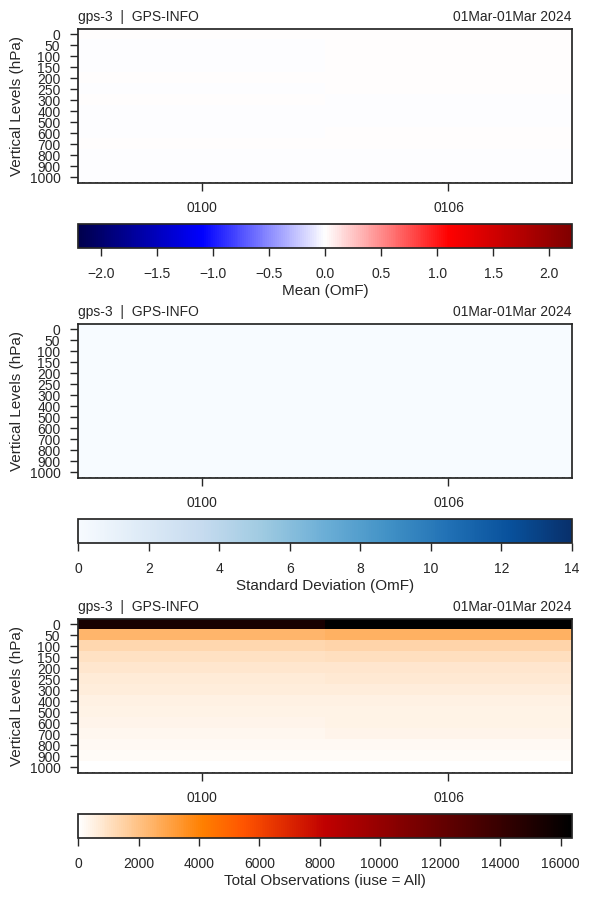

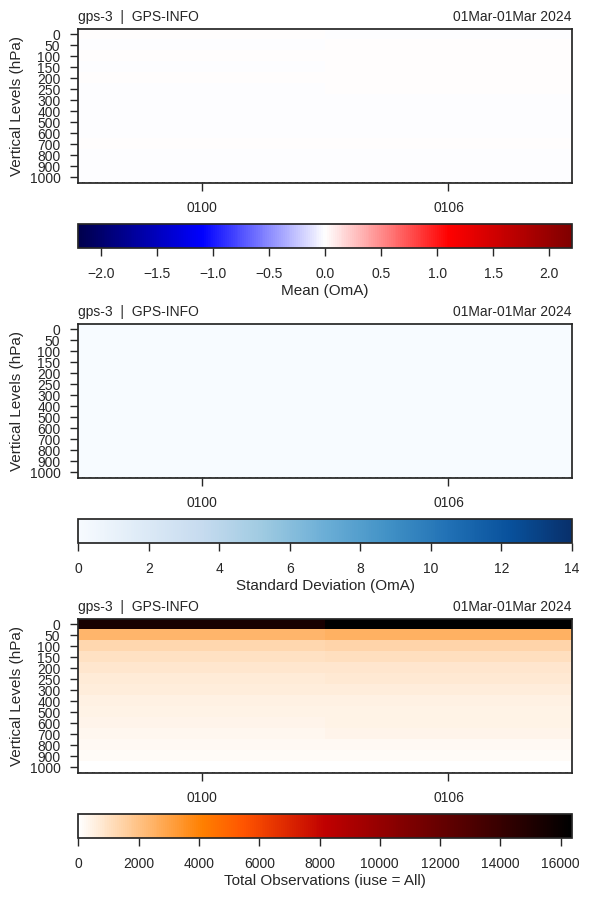

In [46]:
Level = 'Zlevs'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=3, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Se `Lay=None`, então as camadas são preenchidas variando entre o valor médio considerando as camadas inferiores e superiores. Por exemplo, para o nível de 700 hPa é construída uma camada entre 750 e 650 hPa, uma vez que os níveis inferiores e superiores são 800 e 600 hPa, respectivamente. Para o nível de 1000 hPa a camada varia entre 1050 e 950 hPa.

O mesmo exemplo anterior, mas considerando `Level='Zlevs'`:


 Analyzing data of variable: gps  ||  type: 3  ||  GPS-INFO  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-01:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2024-03-01:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]



 Calculating for 2024-03-01:00
 Calculating for 2024-03-01:06


 Making Graphics...
 Done!



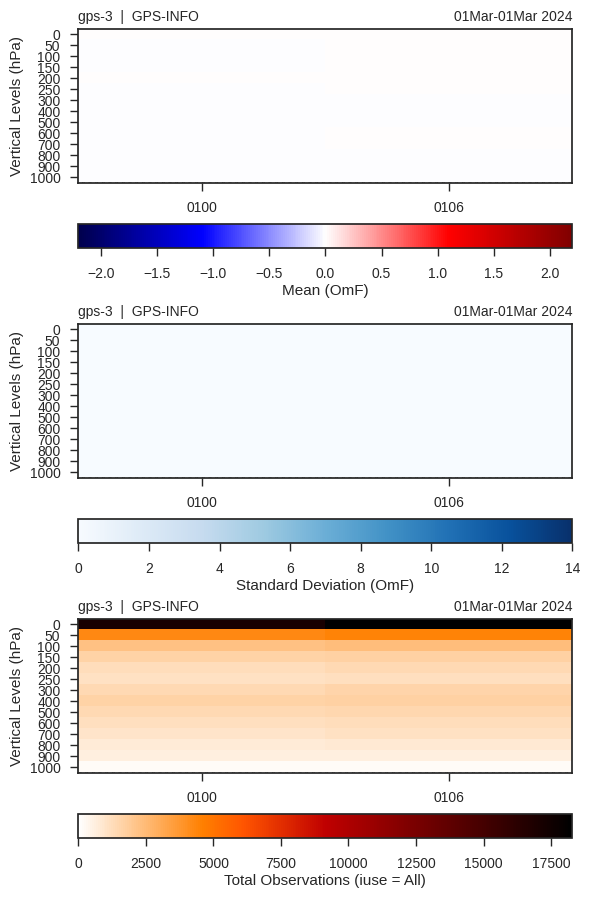

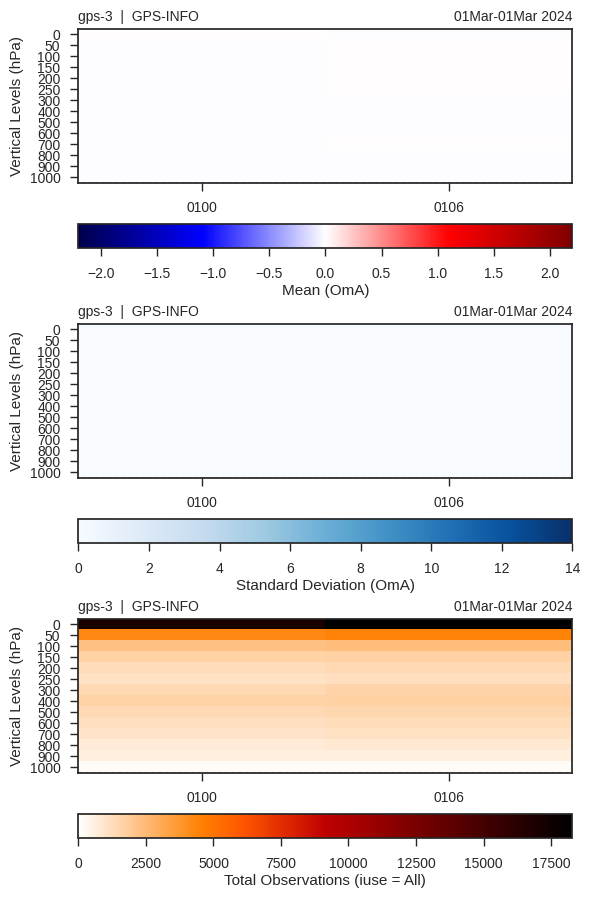

In [47]:
Level = 'Zlevs'
Lay = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=3, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Finalmente, existe a opção de se considerar todos os níveis, ou seja, `Level=None`. Esta opção traz certa dificuldade na visualização da informação na figura por conta da grande quantidade de níveis e distribuição dos dados em todos os níveis:


 Analyzing data of variable: gps  ||  type: 3  ||  GPS-INFO  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-01:00
 Levels:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

 Calculating for 2024-03-01:06


 Making Graphics...
 Done!



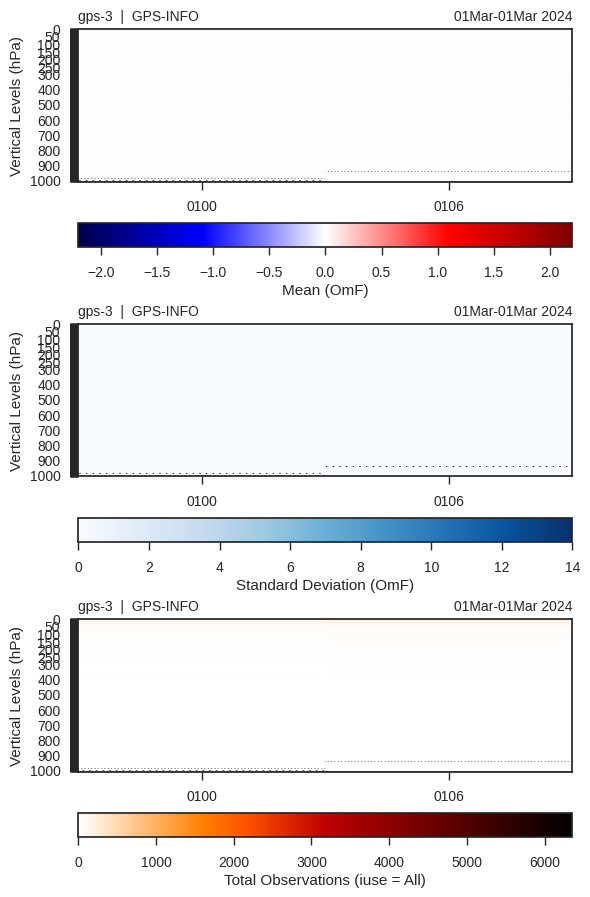

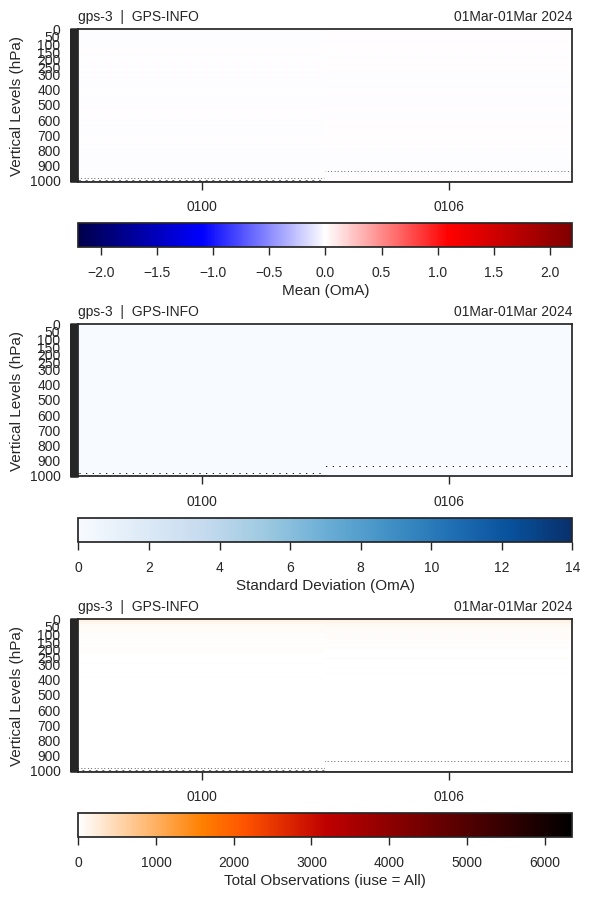

In [48]:
Level = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=3, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Finalizado o uso dos arquivos, feche-os para liberar a memória utilizada:

In [49]:
for file in gdf_list:
    file.close()

O `readDiag` é um pacote em desenvolvimento e em constante atualização. Novas funcionalidades serão adicionadas e demonstradas por meio deste notebook.